In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print("Rows",data.shape[0])
print("Columns",data.shape[1])

Rows 1338
Columns 7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

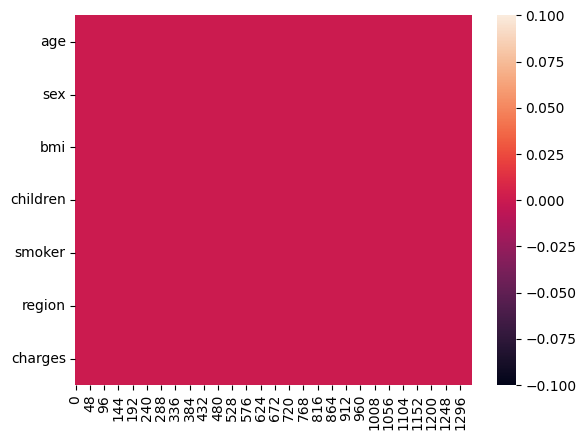

In [6]:
sns.heatmap(data.T.isnull())

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Covert Columns From String To Numerical Values

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
data.select_dtypes(include="object")

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [10]:
data.sex = data.sex.map({"female": 0, "male": 1})

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [12]:
data.smoker = data.smoker.map({"yes": 1, "no": 0})

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
data.region = data.region.map({
    "southwest": 1,
    "southeast": 2,
    "northwest": 3,
    "northeast": 4
})

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [17]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


# Store Feature Matrix In X and Response(Target) In Vector y

In [18]:
X = data.drop(["charges"], axis=1)
y = data["charges"]

# Train/Test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Models

In [20]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
svm = SVR()
svm.fit(X_train,y_train)

SVR()

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on Test Data

In [25]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

data_pred = pd.DataFrame({
    'Actual': y_test,
    'Lr': y_pred1,
    'svm': y_pred2,
    'rf': y_pred3,
    'gr': y_pred4
})

In [26]:
data_pred

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10892.053046,11001.128629
887,5272.17580,7116.295018,9492.515425,5332.718668,5840.174656
890,29330.98315,36909.013521,9648.758701,28431.422397,28001.980112
1293,9301.89355,9507.874691,9555.044136,9807.220505,9745.291602
259,33750.29180,27013.350008,9420.421978,34897.950586,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46934.946640,45431.423211
575,12222.89830,11814.555568,9625.431547,12829.685034,12465.025294
535,6067.12675,7638.107736,9504.168517,6407.258706,6974.336525
543,63770.42801,40959.081722,9605.004594,46730.395839,47862.047791


# Compare Performance Visually

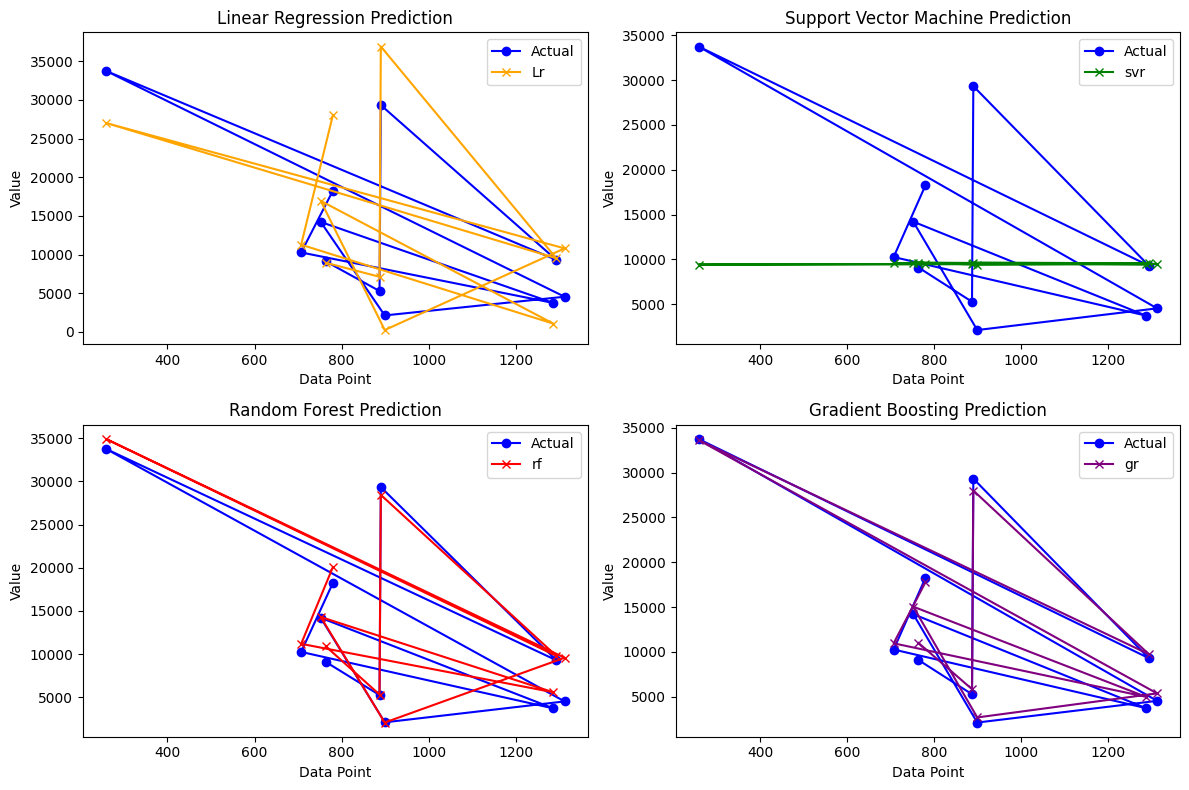

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.plot(data_pred['Actual'].iloc[0:11], label='Actual', color='blue', marker='o')
plt.plot(data_pred['Lr'].iloc[0:11], label="Lr", color='orange', marker='x')
plt.title('Linear Regression Prediction')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

plt.subplot(222)
plt.plot(data_pred['Actual'].iloc[0:11], label='Actual', color='blue', marker='o')
plt.plot(data_pred['svm'].iloc[0:11], label="svr", color='green', marker='x')
plt.title('Support Vector Machine Prediction')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

plt.subplot(223)
plt.plot(data_pred['Actual'].iloc[0:11], label='Actual', color='blue', marker='o')
plt.plot(data_pred['rf'].iloc[0:11], label="rf", color='red', marker='x')
plt.title('Random Forest Prediction')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

plt.subplot(224)
plt.plot(data_pred['Actual'].iloc[0:11], label='Actual', color='blue', marker='o')
plt.plot(data_pred['gr'].iloc[0:11], label="gr", color='purple', marker='x')
plt.title('Gradient Boosting Prediction')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()

plt.show()


# Evaluating the Algorithm

In [28]:
from sklearn import metrics

In [29]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

score1,score2,score3,score4

(0.7833463107364539,
 -0.07229762787861826,
 0.8630021215053305,
 0.8779726251291786)

In [30]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

s1,s2,s3,s4

(4186.508898366434, 8592.428727899724, 2501.0379612756533, 2447.9515580545844)

# Predict Charges For New Customer

In [31]:
data_predict = pd.DataFrame(data={
    'age' : 40,
    'sex' : 0,
    'bmi' : 40.30,
    'children' : 4,
    'smoker' : 0,
    'region' : 3
}, index=["v"])
data_predict

,age,sex,bmi,children,smoker,region
v,40,0,40.3,4,0,3


In [32]:
new_pred = gr.predict(data_predict)

In [33]:
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  9464.27756820553


## From above we found that gredianBoostingRegressor is the best model for this dataset. Before production, it is good practice to train our model on the entire dataset.

In [34]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [35]:
new_pred = gr.predict(data_predict)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  9866.074013969424


# for gui example with flet ==> https://github.com/OmarBelfeki/Health-Insurance-Cost-Prediction-flet_interface